In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train_data.csv').set_index('PassengerId')
test = pd.read_csv('test_data.csv').set_index('PassengerId')

In [4]:
train['Is alone']= 0
train.loc[(train['SibSp'] == 0) & (train['Parch'] == 0), 'Is alone'] = 1
train = train.drop(['Ticket', 'Name', 'Cabin'], axis=1)
train.loc[:, 'Sex'] = train['Sex'].apply(lambda x: 0 if x == 'female' else 1)
train = pd.get_dummies(train)
# train.loc[:, 'Fare'] = preprocessing.scale(train['Fare'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,0,1
2,1,1,0,38.0,1,0,71.2833,0,1,0,0
3,1,3,0,26.0,0,0,7.9250,1,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,0,1
5,0,3,1,35.0,0,0,8.0500,1,0,0,1


In [5]:
test['Is alone']= 0
test.loc[(test['SibSp'] == 0) & (test['Parch'] == 0), 'Is alone'] = 1
test = test.drop(['Ticket', 'Name', 'Cabin'], axis=1)
test.loc[:, 'Sex'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
test = pd.get_dummies(test)
# test.loc[:, 'Fare'] = preprocessing.scale(test['Fare'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0,1,0
893,3,0,47.0,1,0,7.0000,0,0,0,1
894,2,1,62.0,0,0,9.6875,1,0,1,0
895,3,1,27.0,0,0,8.6625,1,0,0,1
896,3,0,22.0,1,1,12.2875,0,0,0,1


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Is alone      418 non-null int64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 27.3 KB


In [7]:
mean_age = test.Age.mean()
std_age = test.Age.std()
test.loc[:, 'Age'] = test['Age'].fillna(np.random.uniform(mean_age - std_age, mean_age + std_age))
test = test.fillna(test.median())

In [8]:
mean_age = train.Age.mean()
std_age = train.Age.std()
train.loc[:, 'Age'] = train['Age'].fillna(np.random.uniform(mean_age - std_age, mean_age + std_age))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Is alone      891 non-null int64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(6), uint8(3)
memory usage: 65.3 KB


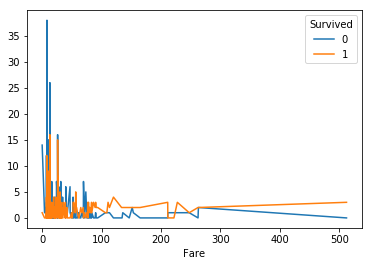

In [10]:
pd.crosstab(train['Fare'], train['Survived']).plot()
# preprocessing.scale(X_train)

In [11]:
# pd.crosstab(np.log(train[train['Fare'] != 0]), train.loc[train['Fare'] != 0, 'Survived']).plot()

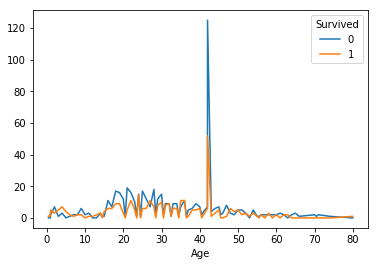

In [12]:
pd.crosstab(train['Age'], train['Survived']).plot()

In [13]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,32.147198,0.523008,0.381594,32.204208,0.602694,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.901622,1.102743,0.806057,49.693429,0.489615,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,42.022503,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [14]:
# train.loc[train['Age'] <= 16, 'Sex'] = 2
# train.loc[train['Age'] >= 45, 'Sex'] = 3

In [15]:
train = train.join(pd.get_dummies(train['Pclass'])).drop('Pclass', axis=1)
test = test.join(pd.get_dummies(test['Pclass'])).drop('Pclass', axis=1)

In [16]:
train_label = train['Survived']
train_features = train.drop('Survived', axis=1)

In [17]:
train_features.head()

,Sex,Age,SibSp,Parch,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S,1,2,3
PassengerId,,,,,,,,,,,,
1,1,22.0,1,0,7.2500,0,0,0,1,0,0,1
2,0,38.0,1,0,71.2833,0,1,0,0,1,0,0
3,0,26.0,0,0,7.9250,1,0,0,1,0,0,1
4,0,35.0,1,0,53.1000,0,0,0,1,1,0,0
5,1,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [18]:
depth = [x for x in range(1, 20)]

In [61]:
forest_classifier = RandomForestClassifier(random_state=0)

In [62]:
clf = GridSearchCV(estimator=forest_classifier, param_grid=dict(max_depth=depth),n_jobs=-1)

In [21]:
linear_classifier = LogisticRegression()

In [22]:
clf = linear_classifier

In [63]:
clf.fit(train_features, train_label)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
clf.best_score_  

0.8204264870931538

In [65]:
clf.best_estimator_.max_depth

8

In [66]:
clf.score(train_features, train_label)

0.9001122334455668

In [43]:
forest_classifier = RandomForestClassifier(random_state=0, max_depth=5)

In [44]:
forest_classifier.fit(train_features, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
forest_classifier.score(train_features, train_label)

0.8507295173961841

In [46]:
forest_classifier.feature_importances_

array([0.48432178, 0.09297071, 0.04193657, 0.03827505, 0.12382852,
       0.00538119, 0.00308965, 0.01282598, 0.01238925, 0.04647415,
       0.03260916, 0.10589798])

In [47]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S,1,2,3
PassengerId,,,,,,,,,,,,
892,1,34.5,0,0,7.8292,1,0,1,0,0,0,1
893,0,47.0,1,0,7.0000,0,0,0,1,0,0,1
894,1,62.0,0,0,9.6875,1,0,1,0,0,1,0
895,1,27.0,0,0,8.6625,1,0,0,1,0,0,1
896,0,22.0,1,1,12.2875,0,0,0,1,0,0,1


In [58]:
predicted = clf.predict(test)

In [59]:
answer = pd.DataFrame({  'PassengerId' : test.index,
                         'Survived' : predicted})

In [60]:
answer.to_csv('answer.csv', index=False)